In [50]:
import pandas as pd


file_path = "Cervezas.csv"


df = pd.read_csv(file_path)


print(df.head())


  id. cervecera         nombre cervecera  fecha encuesta  nota global  aroma  \
0          1075  Caldera Brewing Company    1.210469e+09          4.0    4.0   
1          1075  Caldera Brewing Company    1.299617e+09          2.5    3.5   
2          1075  Caldera Brewing Company    1.262623e+09          4.5    3.5   
3          1075  Caldera Brewing Company    1.281982e+09          4.0    4.0   
4          1075  Caldera Brewing Company    1.280541e+09          5.0    4.0   

   aspecto  encuestado                   estilo  paladar  gusto  \
0      4.5     Wasatch  American Pale Ale (APA)      4.0    4.0   
1      4.0   Thorpe429  American Pale Ale (APA)      2.0    2.5   
2      3.5      rfgetz  American Pale Ale (APA)      4.0    4.0   
3      4.0       Brent             American IPA      4.0    4.0   
4      4.5  JohnQVegas             American IPA      4.5    5.0   

             nombre  volument de alcohol id. cerveza;;;;  
0  Caldera Pale Ale                  5.5       25414;;;; 

# Analisis exploratorio de los datos

In [51]:

print(df.info())


print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15866 entries, 0 to 15865
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id. cervecera        15866 non-null  object 
 1   nombre cervecera     15273 non-null  object 
 2   fecha encuesta       15273 non-null  float64
 3   nota global          15273 non-null  float64
 4   aroma                15273 non-null  float64
 5   aspecto              15273 non-null  float64
 6   encuestado           15271 non-null  object 
 7   estilo               15273 non-null  object 
 8   paladar              15273 non-null  float64
 9   gusto                15273 non-null  float64
 10  nombre               15273 non-null  object 
 11  volument de alcohol  14644 non-null  float64
 12  id. cerveza;;;;      15273 non-null  object 
dtypes: float64(7), object(6)
memory usage: 1.6+ MB
None
  id. cervecera         nombre cervecera  fecha encuesta  nota global  aroma  \
0   

In [52]:
# Display summary statistics of numerical columns
print(df.describe())


       fecha encuesta   nota global         aroma       aspecto       paladar  \
count    1.527300e+04  15273.000000  15273.000000  15273.000000  15273.000000   
mean     1.225787e+09      3.813822      3.733517      3.834545      3.741505   
std      7.645373e+07      0.719311      0.692931      0.617425      0.680057   
min      9.330336e+08      1.000000      1.000000      1.000000      1.000000   
25%      1.176250e+09      3.500000      3.500000      3.500000      3.500000   
50%      1.241302e+09      4.000000      4.000000      4.000000      4.000000   
75%      1.290399e+09      4.500000      4.000000      4.000000      4.000000   
max      1.326258e+09      5.000000      5.000000      5.000000      5.000000   

              gusto  volument de alcohol  
count  15273.000000         14644.000000  
mean       3.790022             7.040164  
std        0.728952             2.347019  
min        1.000000             0.450000  
25%        3.500000             5.200000  
50%        4

In [53]:
# Display unique values in categorical columns
for column in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {column}: {df[column].nunique()}")
    print(df[column].value_counts())
    print()


Unique values in id. cervecera: 2313
id. cervecera
35       434
10099    350
147      335
140      292
132      237
        ... 
2907       1
18316      1
11341      1
794        1
14359      1
Name: count, Length: 2313, dtype: int64

Unique values in nombre cervecera: 1714
nombre cervecera
Boston Beer Company (Samuel Adams)     434
Dogfish Head Brewery                   350
Stone Brewing Co.                      335
Sierra Nevada Brewing Co.              292
Rogue Ales                             237
                                      ... 
Harbor City Brewing Company              1
Hideout Brewing Company                  1
Al's of Hampden / Pizza Boy Brewing      1
Birra Tirana                             1
The Defiant Brewing Company              1
Name: count, Length: 1714, dtype: int64

Unique values in encuestado: 5235
encuestado
northyorksammy    66
BuckeyeNation     47
mikesgroove       41
akorsak           35
johnmichaelsen    35
                  ..
ABrewOrTwo         1
hy

/Users/gustavo.aguado/anaconda3/envs/base_ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


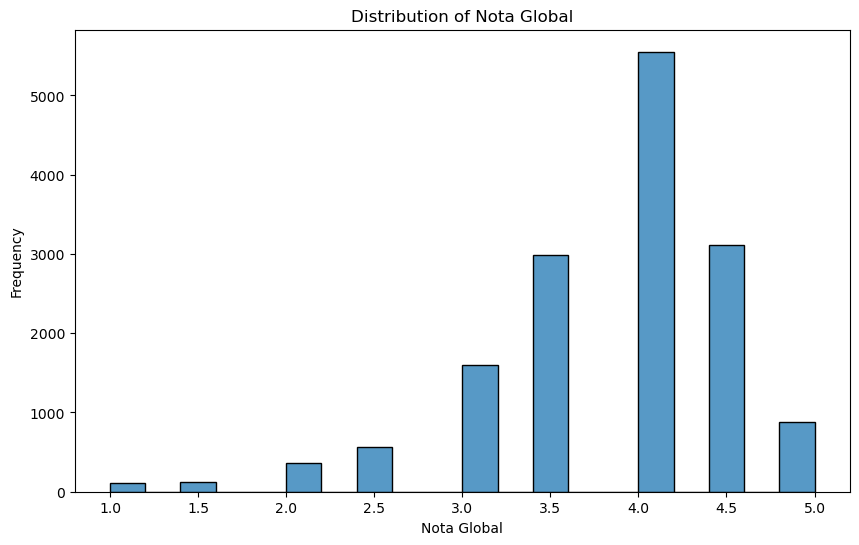

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the 'nota global' column
plt.figure(figsize=(10, 6))
sns.histplot(df['nota global'], bins=20)
plt.title('Distribution of Nota Global')
plt.xlabel('Nota Global')
plt.ylabel('Frequency')
plt.show()


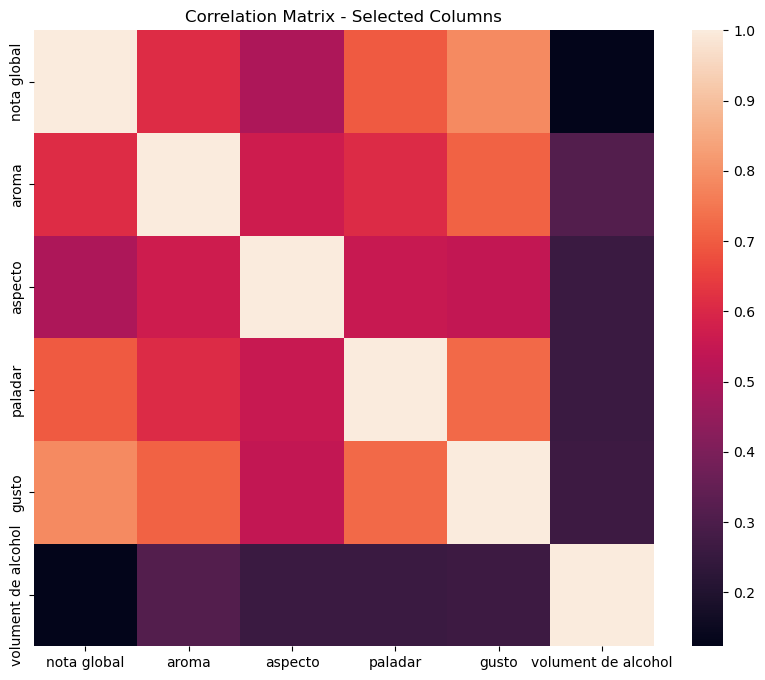

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
selected_columns = ['nota global', 'aroma', 'aspecto', 'paladar', 'gusto', 'volument de alcohol']

# Ensure selected columns are numeric (convert if needed)
df[selected_columns] = df[selected_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in selected columns
selected_data = df[selected_columns].dropna()

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Transform the correlation matrix into a 2D array
correlation_array = correlation_matrix.values

# Visualize the correlation matrix as a heatmap using the 2D array
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False)
plt.title('Correlation Matrix - Selected Columns')
plt.show()






In [56]:
correlation_matrix

,nota global,aroma,aspecto,paladar,gusto,volument de alcohol
nota global,1.000000,0.611351,0.498980,0.696853,0.786601,0.123242
aroma,0.611351,1.000000,0.565494,0.608426,0.710171,0.314045
aspecto,0.498980,0.565494,1.000000,0.553214,0.543455,0.257506
paladar,0.696853,0.608426,0.553214,1.000000,0.724160,0.258327
gusto,0.786601,0.710171,0.543455,0.724160,1.000000,0.266288
volument de alcohol,0.123242,0.314045,0.257506,0.258327,0.266288,1.000000


### La nota está sobre todo correlacionada con el gusto, el paladar y el aroma.

# Modelo de k-means para clusterizar los datos

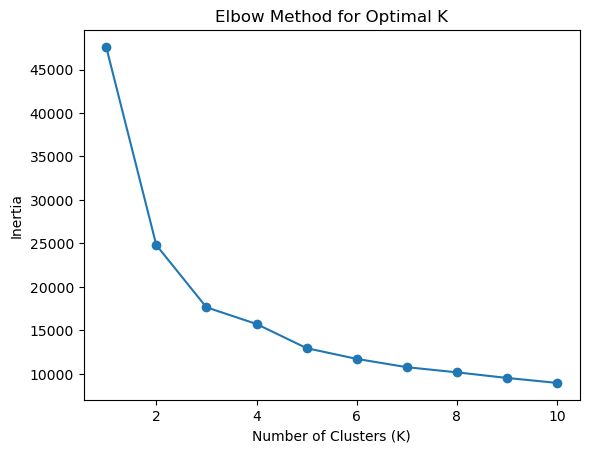

Cluster Centers:
      aroma   paladar     gusto
0  3.560823  3.584828  3.623954
1  4.226416  4.218579  4.323842
2  2.600203  2.607579  2.488555
Data with Cluster Labels:
  id. cervecera         nombre cervecera  fecha encuesta  nota global  aroma  \
0          1075  Caldera Brewing Company    1.210469e+09          4.0    4.0   
1          1075  Caldera Brewing Company    1.299617e+09          2.5    3.5   
2          1075  Caldera Brewing Company    1.262623e+09          4.5    3.5   
3          1075  Caldera Brewing Company    1.281982e+09          4.0    4.0   
4          1075  Caldera Brewing Company    1.280541e+09          5.0    4.0   

   aspecto  encuestado                   estilo  paladar  gusto  \
0      4.5     Wasatch  American Pale Ale (APA)      4.0    4.0   
1      4.0   Thorpe429  American Pale Ale (APA)      2.0    2.5   
2      3.5      rfgetz  American Pale Ale (APA)      4.0    4.0   
3      4.0       Brent             American IPA      4.0    4.0   
4      4.5  J

In [57]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select the desired columns
selected_columns = ['aroma', 'paladar', 'gusto']
selected_data = df[selected_columns]

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
imputed_data = pd.DataFrame(imputer.fit_transform(selected_data), columns=selected_columns)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow method to find the optimal number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow method, choose the optimal K (number of clusters)
optimal_k = 3  # You may choose the appropriate value based on the elbow in the plot

# Apply KMeans with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
df['cluster'] = cluster_labels

# Display the cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=selected_columns)
print("Cluster Centers:")
print(cluster_centers)

# Display the first few rows of the dataframe with cluster labels
print("Data with Cluster Labels:")
print(df.head())



# Primero uso todos los atributos y PCA para representarlo.

In [58]:
# optimal value of k 
optimal_k = 7

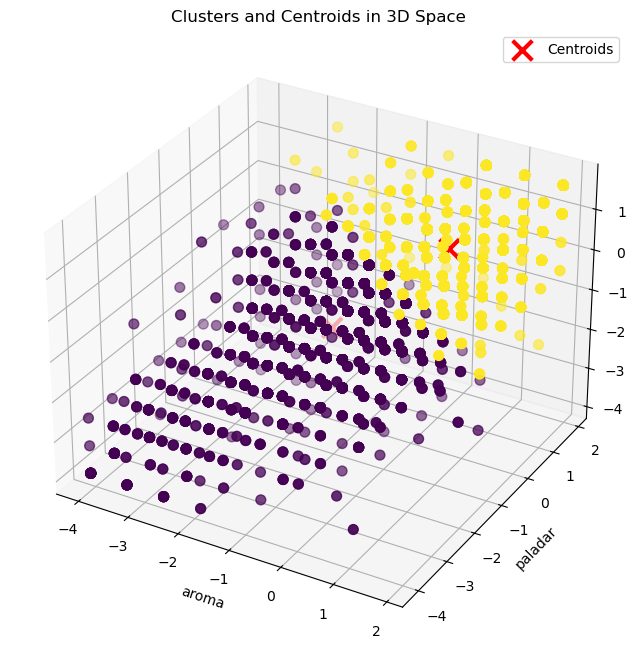

In [63]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Select the desired columns
selected_columns = ['aroma', 'paladar', 'gusto']
selected_data = df[selected_columns]

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
imputed_data = pd.DataFrame(imputer.fit_transform(selected_data), columns=selected_columns)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# Fit KMeans on the scaled data
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
df['cluster'] = cluster_labels

# Plot clusters and centroids in 3D space
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points colored by clusters
scatter = ax.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2], c=cluster_labels, cmap='viridis', s=50)

# Plot centroids
centroid_coordinates = kmeans.cluster_centers_
ax.scatter(centroid_coordinates[:, 0], centroid_coordinates[:, 1], centroid_coordinates[:, 2],
           marker='x', s=200, linewidths=3, color='red', label='Centroids')

# Add labels and legend
ax.set_xlabel('aroma')
ax.set_ylabel('paladar')
ax.set_zlabel('gusto')
ax.set_title('Clusters and Centroids in 3D Space')
ax.legend()

plt.show()


# Ahora, al clusterizar sin la variable objetivo "nota global", en funcion del gusto, el aroma y el paladar, se observan dos clusters bien diferenciados en el espacio.

In [64]:
#Binarizo la nota global

# Set the threshold value
threshold = 2.5

# Create a new column 'rating_category' with 0 or 1 based on the threshold
df['nota categorica'] = (df['nota global'] > threshold).astype(int)

# Display the first few rows of the updated DataFrame
print(df.head())



  id. cervecera         nombre cervecera  fecha encuesta  nota global  aroma  \
0          1075  Caldera Brewing Company    1.210469e+09          4.0    4.0   
1          1075  Caldera Brewing Company    1.299617e+09          2.5    3.5   
2          1075  Caldera Brewing Company    1.262623e+09          4.5    3.5   
3          1075  Caldera Brewing Company    1.281982e+09          4.0    4.0   
4          1075  Caldera Brewing Company    1.280541e+09          5.0    4.0   

   aspecto  encuestado                   estilo  paladar  gusto  \
0      4.5     Wasatch  American Pale Ale (APA)      4.0    4.0   
1      4.0   Thorpe429  American Pale Ale (APA)      2.0    2.5   
2      3.5      rfgetz  American Pale Ale (APA)      4.0    4.0   
3      4.0       Brent             American IPA      4.0    4.0   
4      4.5  JohnQVegas             American IPA      4.5    5.0   

             nombre  volument de alcohol id. cerveza;;;;  cluster  \
0  Caldera Pale Ale                  5.5       

In [65]:
y = df['nota categorica'].copy()
X = scaled_data